# 01 · Initial Data Analysis

## Objetive
The objective of this notebook is to perform an exploratory data analysis (EDA) on a sample of the Citi Bike dataset to:
- Understand the data structure and schema.
- Identify missing values (NaNs) and potential data quality issues.
- Analyze basic distributions regarding user types, bike categories, and station popularity.

**Note:** This notebook uses a sample of the dataset to streamline the initial analysis process.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
custom_palette = ["#004c8c", "#8c8c8c", "#ff9900"] 
sns.set_palette(custom_palette)

## Data loading

Load the trip data corresponding to a sample from January.

In [2]:
DATA_PATH = "../data/raw/202501-citibike-tripdata_1.csv"

df = pd.read_csv(DATA_PATH, low_memory=False)
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (1000000, 13)


## Dataset overview

Inspecting the first rows and data types to understand the schema.

In [3]:
display(df.head())
print("-" * 50)
df.info()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,ACCC919B5A3CD9AD,electric_bike,2025-01-01 14:52:26.542,2025-01-01 14:59:53.427,W 20 St & 7 Ave,6182.02,E 10 St & 2 Ave,5746.02,40.742388,-73.997262,40.729708,-73.986598,casual
1,1FABDF3EE40FCB0E,classic_bike,2025-01-10 05:03:13.646,2025-01-10 05:13:13.331,W 20 St & 7 Ave,6182.02,E 25 St & 1 Ave,6004.07,40.742388,-73.997262,40.738177,-73.977387,member
2,88F0F3CFCBC79652,classic_bike,2025-01-13 13:40:17.630,2025-01-13 13:47:05.817,St James Pl & Oliver St,5238.05,Fulton St & William St,5137.11,40.713079,-73.998512,40.709601,-74.006551,member
3,6FDE4E191D58E453,electric_bike,2025-01-10 08:29:16.996,2025-01-10 08:34:49.360,St James Pl & Oliver St,5238.05,Fulton St & William St,5137.11,40.713079,-73.998512,40.709601,-74.006551,member
4,E9B03B9F77A85455,electric_bike,2025-01-11 18:59:48.427,2025-01-11 19:13:21.292,E 33 St & 1 Ave,6197.08,Allen St & Rivington St,5414.06,40.743227,-73.974498,40.720196,-73.989978,member


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1000000 non-null  object 
 1   rideable_type       1000000 non-null  object 
 2   started_at          1000000 non-null  object 
 3   ended_at            1000000 non-null  object 
 4   start_station_name  999685 non-null   object 
 5   start_station_id    999685 non-null   object 
 6   end_station_name    998051 non-null   object 
 7   end_station_id      997848 non-null   object 
 8   start_lat           999685 non-null   float64
 9   start_lng           999685 non-null   float64
 10  end_lat             997853 non-null   float64
 11  end_lng             997853 non-null   float64
 12  member_casual       1000000 non-null  object 
dtypes: float64(4), object(9)
memory usage: 99.2+ MB


## Missing Value Analysis

The volume of null values is examined across different columns to decide on a cleaning strategy.

In [4]:
# Calculate percentage of missing values for better context
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage (%)': missing_pct.sort_values(ascending=False)})
display(missing_df[missing_df['Missing Count'] > 0])

,Missing Count,Percentage (%)
end_station_id,2152,0.2152
end_lat,2147,0.2147
end_lng,2147,0.2147
end_station_name,1949,0.1949
start_station_name,315,0.0315
start_lat,315,0.0315
start_station_id,315,0.0315
start_lng,315,0.0315


### Analysis of partial missing data

A specific search is conducted for rows where station data is partially missing. For example, cases where `station_id` exists but coordinates (lat, lng) are missing, or vice-versa. This allows us to infer missing values from other complete records.

In [18]:
# Start and end station columns
cols_start = ['start_station_name', 'start_station_id', 'start_lat', 'start_lng']
cols_end   = ['end_station_name', 'end_station_id', 'end_lat', 'end_lng']

# Identify partial missing data
# Logic: Row has AT LEAST one non-null value AND AT LEAST one null value in the group
# Start station analysis
start_partial = df[cols_start].notna().any(axis=1) & df[cols_start].isna().any(axis=1)

# End station analysis
end_partial = df[cols_end].notna().any(axis=1) & df[cols_end].isna().any(axis=1)

# Combine both conditions to find rows with partial data
df_partial = df[start_partial | end_partial]

# 4. Mostrar resultados
print(f"Rows with recoverable station data: {len(df_partial)}")
display(df_partial.head())

Rows with recoverable station data: 208


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
30031,B5855CA6EF676607,electric_bike,2025-01-10 12:13:51.038,2025-01-10 12:23:11.602,1 Ave & E 30 St,6079.03,E 55 St & 2 Ave,NaN,40.741444,-73.975361,NaN,NaN,member
35547,067B8636BA84CF66,electric_bike,2025-01-12 03:20:06.995,2025-01-12 03:52:16.598,Stanton St & Norfolk St,5445.07,E 55 St & 2 Ave,NaN,40.720747,-73.986274,NaN,NaN,member
37253,708F630298EBF07F,electric_bike,2025-01-03 10:41:31.668,2025-01-03 11:43:14.730,Eastern Pkwy & Schenectady Ave,3893.03,E 51 St & Linden Blvd,NaN,40.668760,-73.933760,NaN,NaN,casual
38510,B691867E0E951227,electric_bike,2025-01-13 13:04:57.998,2025-01-13 13:21:33.688,Montague St & Clinton St,4677.06,Allen St & Rivington St,NaN,40.694271,-73.992327,NaN,NaN,member
38855,5EAC571B8FEB39A2,electric_bike,2025-01-14 08:37:46.671,2025-01-14 08:45:00.708,E 6 St & Ave D,5506.14,Allen St & Rivington St,NaN,40.722281,-73.976687,NaN,NaN,member


### Data consistency check

Before inferring missing values, we verify that a specific `station_id` always corresponds to the same coordinates (lat, lng) and name.

In [5]:
# Test Case 1
station_name_1 = "1 Ave & E 30 St"
print(f"Checking consistency for: {station_name_1}")
subset_1 = df[df['start_station_name'] == station_name_1]
print(f"Unique IDs: {subset_1['start_station_id'].unique()}")
print(f"Unique Lats: {subset_1['start_lat'].unique()}")
print(f"Unique Lngs: {subset_1['start_lng'].unique()}")

print("-" * 40)

# Test Case 2
station_name_2 = "Stanton St & Norfolk St"
print(f"Checking consistency for: {station_name_2}")
subset_2 = df[df['start_station_name'] == station_name_2]
print(f"Unique IDs: {subset_2['start_station_id'].unique()}")
print(f"Unique Lats: {subset_2['start_lat'].unique()}")
print(f"Unique Lngs: {subset_2['start_lng'].unique()}")

Checking consistency for: 1 Ave & E 30 St
Unique IDs: ['6079.03']
Unique Lats: [40.74144387]
Unique Lngs: [-73.97536082]
----------------------------------------
Checking consistency for: Stanton St & Norfolk St
Unique IDs: ['5445.07']
Unique Lats: [40.720747]
Unique Lngs: [-73.986274]


Station IDs appear consistent with their coordinates, so inference is feasible.

## Exploratory data analysis

### Distribution by bike type
Which vehicles are most used in the fleet?

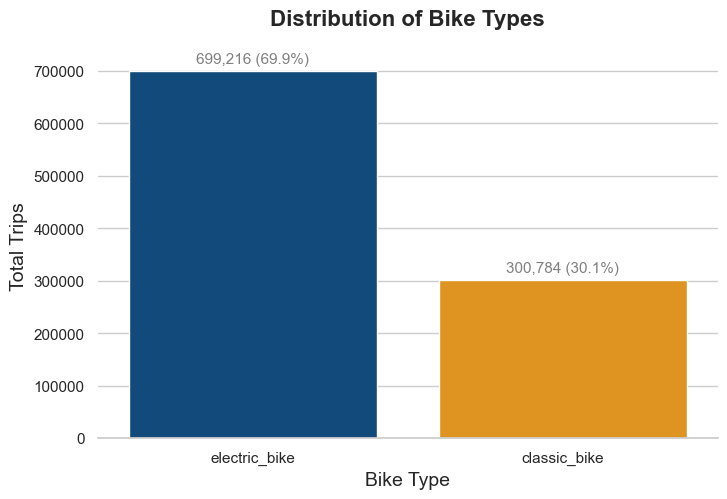

In [45]:
# Prepare data
bike_counts = df['rideable_type'].value_counts().reset_index()
bike_counts.columns = ['Type', 'Count']

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=bike_counts, x='Type', y='Count', hue='Type', palette=["#004c8c", "#ff9900"])

# Styling
plt.title("Distribution of Bike Types", fontweight='bold', pad=20)
plt.xlabel("Bike Type")
plt.ylabel("Total Trips")
sns.despine(left=True)

# Add value labels
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    ax.annotate(f'{int(p.get_height()):,} ({percentage})',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=11, color='grey')

plt.show()

### Distribution by user membership
Comparison between annual members and casual users.

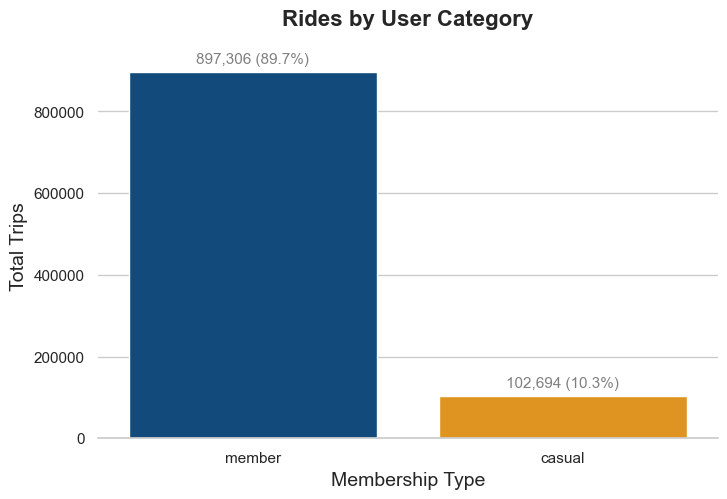

In [43]:
# Prepare data
user_counts = df['member_casual'].value_counts().reset_index()
user_counts.columns = ['Membership', 'Count']

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=user_counts, x='Membership', y='Count', hue='Membership', palette=["#004c8c", "#ff9900"])

# Styling
plt.title("Rides by User Category", fontweight='bold', pad=20)
plt.xlabel("Membership Type")
plt.ylabel("Total Trips")
sns.despine(left=True)

# Add percentage annotations
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    ax.annotate(f'{int(p.get_height()):,} ({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=11, color='grey')

plt.show()

### Top 10 start stations
Identifying the busiest hubs for starting trips.

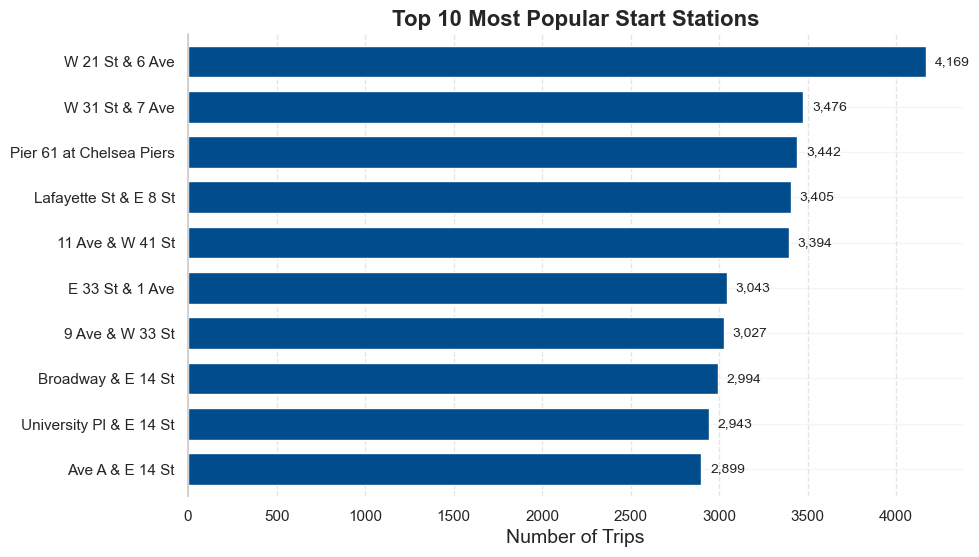

In [39]:
# Get Top 10 stations
top_start = df['start_station_name'].value_counts().head(10).sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
ax = top_start.plot(kind='barh', color='#004c8c', width=0.7)

# Styling
plt.title("Top 10 Most Popular Start Stations", fontweight='bold')
plt.xlabel("Number of Trips")
plt.ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.grid(axis='y', alpha=0.2) 
sns.despine(bottom=True)

# Add value labels
for index, value in enumerate(top_start):
    plt.text(value + 50, index, str(f"{value:,}"), va='center', fontsize=10)

plt.show()

### Top 10 end stations
Identifying the most common destinations.

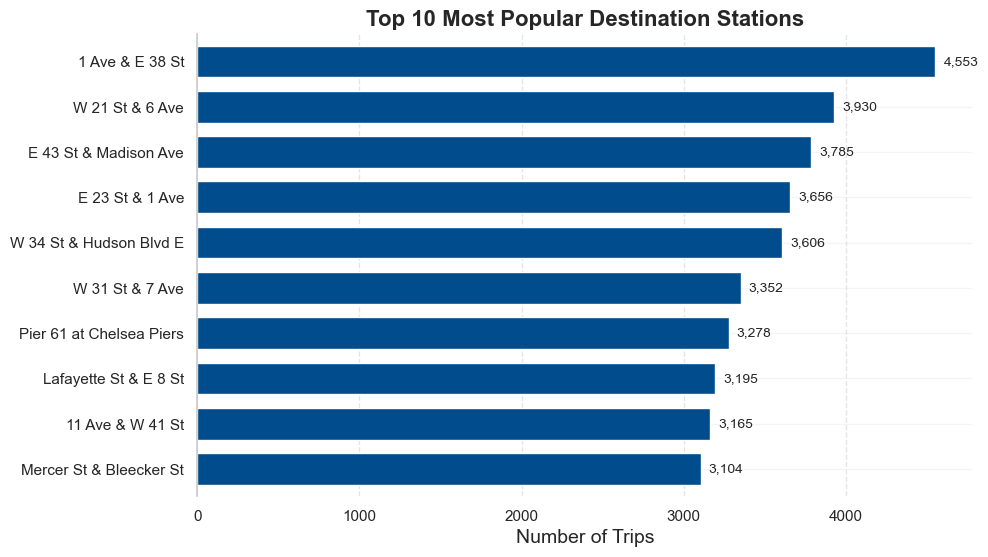

In [42]:
# Get Top 10 end stations
top_end = df['end_station_name'].value_counts().head(10).sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
ax = top_end.plot(kind='barh', color='#004c8c', width=0.7)

# Styling
plt.title("Top 10 Most Popular Destination Stations", fontweight='bold')
plt.xlabel("Number of Trips")
plt.ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.grid(axis='y', alpha=0.2) 
sns.despine(bottom=True)

# Add value labels
for index, value in enumerate(top_end):
    plt.text(value + 50, index, str(f"{value:,}"), va='center', fontsize=10)

plt.show()

## Preliminaty conclusions

1. The dataset is robust but contains NaN values in station identifiers and coordinates.
    - 208 rows were identified with partial station data (e.g., ID present but coordinates missing) that can be recovered through data imputation.
    - Remaining rows with fully missing station data might need to be dropped.
2. There is a clear distinction between `member` and `casual` usage. Members account for the majority of trips, suggesting a strong commuter base.
3. Electric bikes are the preferred choice, representing 69.9% of the trips, while classic bikes account for the remaining 30.1%.
